# Movie Ratings Predictions

* Build classifier to predict "Rotten", "Fresh," or "certified Fresh"

* Two main approaches: (1) Sentiment Analysis (TODO), (2) Numerical and Categorical Features with XGBoost

Things I've learned:
- Make sub df's where you put numerical, ordinal, and categorical features and then create pipeline for preprocessing train/test data.
- Built in scikit encoders don't always make things easier.
- Feature engineering didn't actually affect things all that much. With this few features, you could pick and choose by hand.

## EDA
- Theories: Different directors may judge more harshly. Audience score is probably a good predictor...but there are some famous exceptions to this when audience and critics have famously differing reactions

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as px

In [4]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


In [8]:
critics = pd.read_csv('../input/rotten-tomatoes-rating-prediction/datasets/rotten_tomatoes_critic_reviews_50k.csv')
movies = pd.read_csv('../input/rotten-tomatoes-rating-prediction/datasets/rotten_tomatoes_movies.csv')
movies.shape

(17712, 22)

### TODO: Create Column Transformer Pipeline

### Temp: Reproduce Results as Sanity Check

Size of training data is 13613 and the size of test data is 3404
0.9908930669800236
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


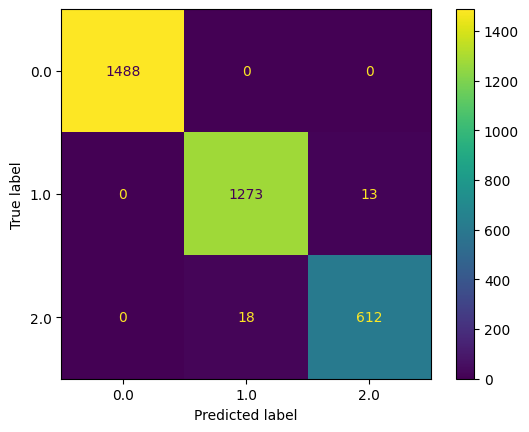

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score

movies = pd.read_csv('../input/rotten-tomatoes-rating-prediction/datasets/rotten_tomatoes_movies.csv')
# Create copy of dataframe
rf_movies = movies.copy()
# One hot encoding of movie ratings
content_onehot = pd.get_dummies(rf_movies.content_rating)
# Ordinal of audience status
audience_ord = pd.DataFrame(rf_movies.audience_status.replace(['Spilled', 'Upright'], [0,1]))
# Ordinal of tomatometer_status (target)
target_ord = pd.DataFrame(rf_movies.tomatometer_status.replace(['Rotten', 'Fresh', 'Certified-Fresh'], [0,1,2]))
# Combine engineered features
movies_final = pd.concat([rf_movies[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 
                                 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 
                                 'tomatometer_rotten_critics_count']], content_onehot, audience_ord, target_ord], axis=1).dropna()
movies_final.head()
#ax = movies_final.tomatometer_status.value_counts().plot(kind='bar')
#ax.bar_label(ax.containers[0])
X_train, X_test, y_train, y_test = train_test_split(movies_final.drop(['tomatometer_status'], axis=1), movies_final.tomatometer_status, 
                                                   test_size=0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

rf = RandomForestClassifier(random_state=2)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf, X_test, y_test)

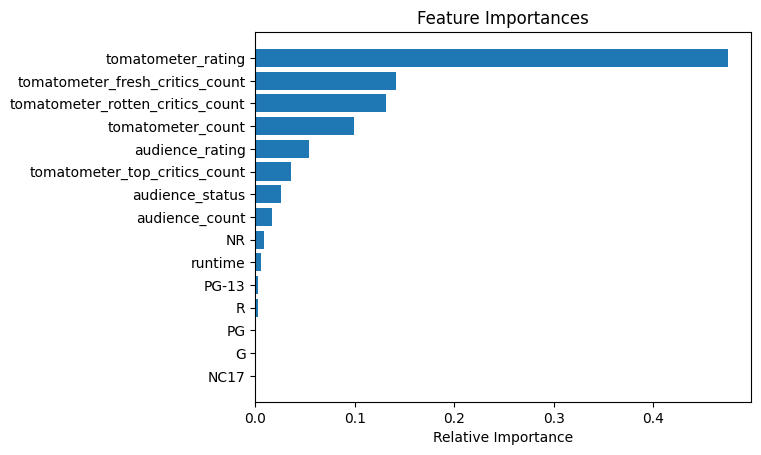

In [21]:
# Look at feature importances
def graph_feature_importance(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    features = X_train.columns
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
graph_feature_importance(rf)

### XGBoost Application

Size of training data is 13803 and the size of test data is 3451
0.9927557229788467
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1464
         1.0       0.99      0.99      0.99      1360
         2.0       0.98      0.98      0.98       627

    accuracy                           0.99      3451
   macro avg       0.99      0.99      0.99      3451
weighted avg       0.99      0.99      0.99      3451



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

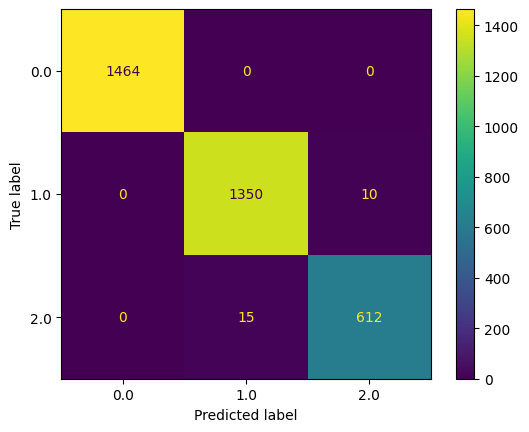

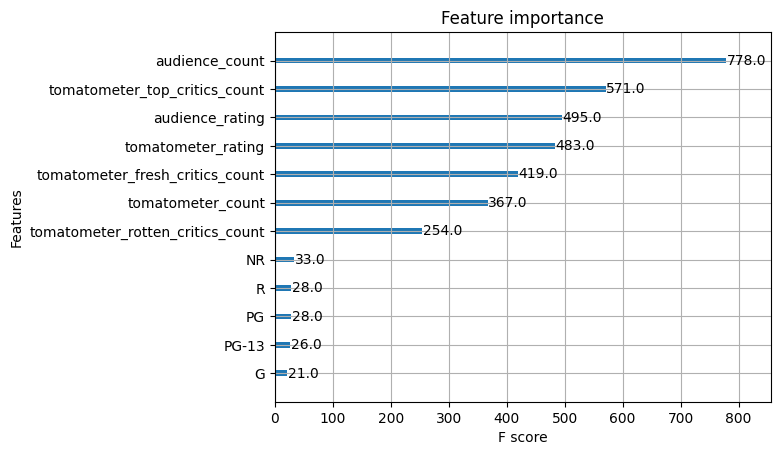

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

movies = pd.read_csv('../input/rotten-tomatoes-rating-prediction/datasets/rotten_tomatoes_movies.csv')
# Select numeric features to be considered (remove runtime)
numeric = movies[['tomatometer_rating', 'tomatometer_count', 'audience_rating', 
                                 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 
                                 'tomatometer_rotten_critics_count']]
#num_scaler = StandardScaler()
#num_scaled = pd.DataFrame(movies[]fit_transform(movies)
# One hot encoding of movie ratings
content_onehot = pd.get_dummies(movies.content_rating)
# Ordinal of audience status
audience_ord = pd.DataFrame(movies.audience_status.replace(['Spilled', 'Upright'], [0,1]))
# Ordinal of tomatometer_status (target)
target_ord = pd.DataFrame(movies.tomatometer_status.replace(['Rotten', 'Fresh', 'Certified-Fresh'], [0,1,2]))
# Combine engineered features
movies_final = pd.concat([numeric, content_onehot, audience_ord, target_ord], axis=1).dropna()
movies_final.head()
#ax = movies_final.tomatometer_status.value_counts().plot(kind='bar')
#ax.bar_label(ax.containers[0])
X_train, X_test, y_train, y_test = train_test_split(movies_final.drop(['tomatometer_status'], axis=1), movies_final.tomatometer_status, 
                                                   test_size=0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

xg_cl = xgb.XGBClassifier(seed = 123)
xg_cl.fit(X_train,y_train)
y_pred = xg_cl.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xg_cl, X_test, y_test)
xgb.plot_importance(xg_cl)

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=xg_cl, n_features_to_select = 1, step = 1)
rfe.fit(X_test,y_test)

<AxesSubplot:>

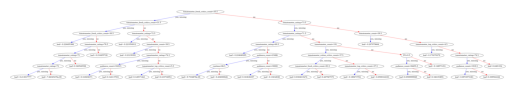

In [19]:
import graphviz
from matplotlib.pylab import rcParams
plt.rcdefaults()
#rcParams['figure.figsize'] = 200, 50
xgb.plot_tree(xg_cl, num_trees=2)

### Logistic Regression

Size of training data is 13613 and the size of test data is 3404
0.8216803760282021
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      1488
         1.0       0.72      0.89      0.79      1286
         2.0       0.79      0.55      0.65       630

    accuracy                           0.82      3404
   macro avg       0.82      0.77      0.79      3404
weighted avg       0.83      0.82      0.82      3404



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


AttributeError: 'LogisticRegressionCV' object has no attribute 'feature_importances_'

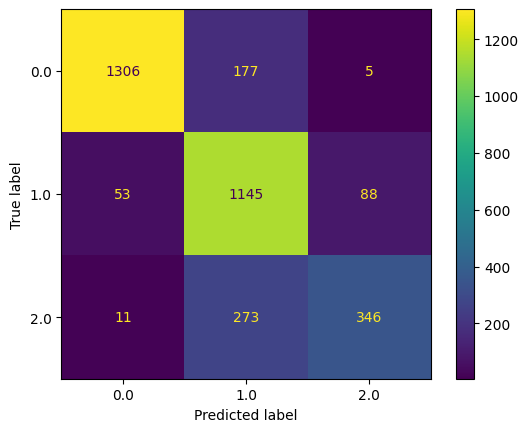

In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score

movies = pd.read_csv('../input/rotten-tomatoes-rating-prediction/datasets/rotten_tomatoes_movies.csv')
# One hot encoding of movie ratings
content_onehot = pd.get_dummies(movies.content_rating)
# Ordinal of audience status
audience_ord = pd.DataFrame(movies.audience_status.replace(['Spilled', 'Upright'], [0,1]))
# Ordinal of tomatometer_status (target)
target_ord = pd.DataFrame(movies.tomatometer_status.replace(['Rotten', 'Fresh', 'Certified-Fresh'], [0,1,2]))
# Combine engineered features
movies_final = pd.concat([movies[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 
                                 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 
                                 'tomatometer_rotten_critics_count']], content_onehot, audience_ord, target_ord], axis=1).dropna()
movies_final.head()
#ax = movies_final.tomatometer_status.value_counts().plot(kind='bar')
#ax.bar_label(ax.containers[0])
X_train, X_test, y_train, y_test = train_test_split(movies_final.drop(['tomatometer_status'], axis=1), movies_final.tomatometer_status, 
                                                   test_size=0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

clf = LogisticRegressionCV(multi_class='multinomial', max_iter=500)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)
graph_feature_importance(clf)

### MLP Neural Network (sklearn implementation)

Size of training data is 13613 and the size of test data is 3404
0.709165687426557
              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81      1488
         1.0       0.57      0.95      0.71      1286
         2.0       0.99      0.22      0.37       630

    accuracy                           0.71      3404
   macro avg       0.84      0.63      0.63      3404
weighted avg       0.81      0.71      0.69      3404



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


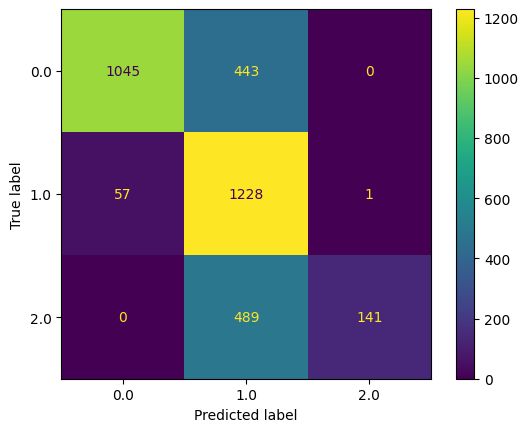

In [31]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score

movies = pd.read_csv('../input/rotten-tomatoes-rating-prediction/datasets/rotten_tomatoes_movies.csv')
# One hot encoding of movie ratings
content_onehot = pd.get_dummies(movies.content_rating)
# Ordinal of audience status
audience_ord = pd.DataFrame(movies.audience_status.replace(['Spilled', 'Upright'], [0,1]))
# Ordinal of tomatometer_status (target)
target_ord = pd.DataFrame(movies.tomatometer_status.replace(['Rotten', 'Fresh', 'Certified-Fresh'], [0,1,2]))
# Combine engineered features
movies_final = pd.concat([movies[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 
                                 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 
                                 'tomatometer_rotten_critics_count']], content_onehot, audience_ord, target_ord], axis=1).dropna()
movies_final.head()
#ax = movies_final.tomatometer_status.value_counts().plot(kind='bar')
#ax.bar_label(ax.containers[0])
X_train, X_test, y_train, y_test = train_test_split(movies_final.drop(['tomatometer_status'], axis=1), movies_final.tomatometer_status, 
                                                   test_size=0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

clf = MLPClassifier(max_iter=500)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)

In [3]:
# Get numeric and categorical variables
numeric = movies[['runtime','tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']]

#### Numeric Features
- Below we look for missing values. We notice that 44 records in movies have missing Nan values for tomatometer status. Some have a mix of other missing numeric variables and often are missing audiecne scores.
- Additionally, there are 448 records with missing audience score values. We probably can't drop all of those or even reliably impute them. Those records seem to have other numerical ratings that aren't missing.
- We could impute or drop these records with missing features. I think **dropping missing values** is best here, since those movies could be terrible or good. 

In [4]:
# Drop entries that have no value for the target
movies = movies[movies.tomatometer_status.notnull()]
movies.shape

(17668, 22)

In [5]:
movies[movies.audience_status.isna()].tomatometer_status.value_counts()
#movies.head()

Fresh              219
Rotten             128
Certified-Fresh     66
Name: tomatometer_status, dtype: int64

Text(0, 0.5, 'Top 20 Reviewer Name')

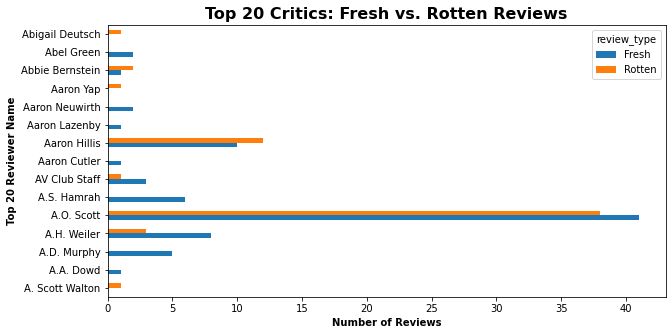

In [6]:
# Create DF of critics and their counts of fresh and rotten reviews
df = critics.groupby(by='critic_name')['review_type'].value_counts()[:20].unstack(level=1, fill_value=0)
fig1 = df.plot(kind='barh', figsize=(10,5))
fig1.set_title('Top 20 Critics: Fresh vs. Rotten Reviews', fontsize=16,fontweight='bold')
fig1.set_xlabel('Number of Reviews', fontweight='bold')
fig1.set_ylabel('Top 20 Reviewer Name', fontweight='bold')

In [7]:
movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


Text(0.5, 1.0, 'Count of Movies by Movie Rating (G-NC17)')

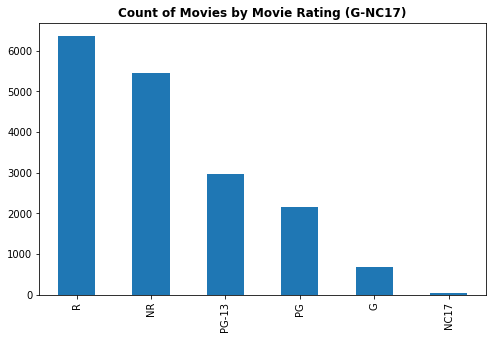

In [8]:
fig2 = movies.content_rating.value_counts().plot(kind='bar', figsize=(8,5))
fig2.set_title('Count of Movies by Movie Rating (G-NC17)',fontweight='bold')

Text(0.5, 1.0, 'Count of Audience Status Ratings')

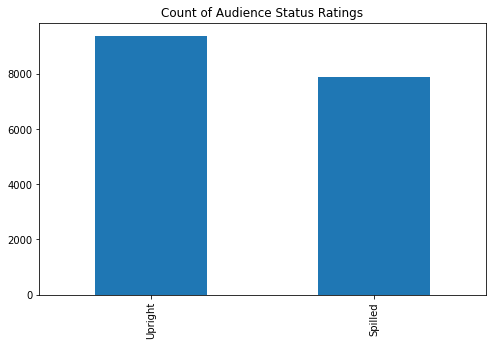

In [9]:
# Are there disagreements between critics and audience?
# Plot the counts of tomatometer vs. audience status
fig = movies.audience_status.value_counts().plot(kind='bar',figsize=(8,5))
fig.set_title('Count of Audience Status Ratings')

Text(0.5, 1.0, 'Count of Critic Status Ratings')

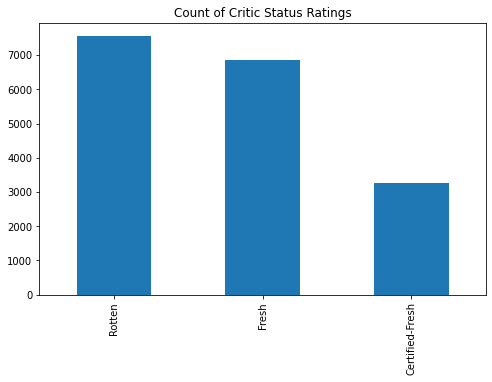

In [10]:
fig = movies.tomatometer_status.value_counts().plot(kind='bar',figsize=(8,5))
fig.set_title('Count of Critic Status Ratings')

In [11]:
movies.content_rating.value_counts()

R        6365
NR       5447
PG-13    2977
PG       2165
G         676
NC17       38
Name: content_rating, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Audience vs. Tomatometer Rating')

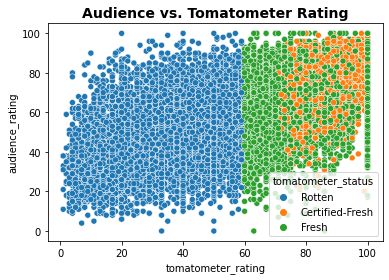

In [12]:
# Graph tomoato meter rating vs date to see if there's any time dependence. There are
# 44 missing values of tomatometer_rating but no missing values for audience rating
df = movies[['tomatometer_rating', 'audience_rating', 'tomatometer_status']]
df = df[df.tomatometer_rating>0]
fig1 = sns.scatterplot('tomatometer_rating','audience_rating', data=df, 
                hue='tomatometer_status')
fig1.set_title('Audience vs. Tomatometer Rating', fontweight='bold',fontsize='14')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


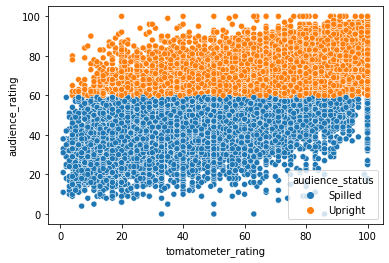

In [13]:
df = movies[['tomatometer_rating', 'audience_rating', 'audience_status']]
df = df[df.tomatometer_rating>0]
fig2 = sns.scatterplot('tomatometer_rating','audience_rating', data=df, 
                hue='audience_status')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


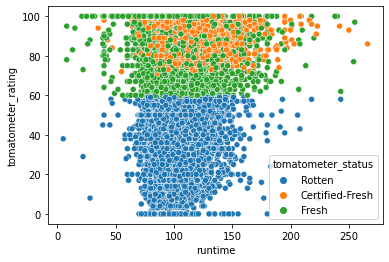

In [14]:
fig3 = sns.scatterplot('runtime', 'tomatometer_rating', data=movies,
                      hue = 'tomatometer_status')

There doesn't appear to be any relationship between rating and run time.

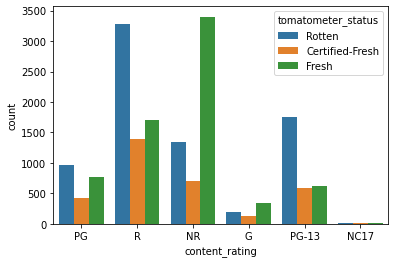

In [15]:
fig4 = sns.countplot(data=movies, x='content_rating', hue='tomatometer_status')

No particular trends noticable between content rating and tomatometer status.

In [16]:
#fig5 = sns.countplot(data=movies, x='production_company', hue='tomatometer_status')
movies.production_company.unique()

array(['20th Century Fox', 'Sony Pictures Classics', 'Waner Bros.', ...,
       'Triumph Films', 'Typecast Pictures', 'Tango Entertainment'],
      dtype=object)

In [17]:
# Look at correlations between numeric variables
corr_matrix = numeric.corr()
corr_matrix['tomatometer_rating'].sort_values(ascending=False)

tomatometer_rating                  1.000000
audience_rating                     0.654068
tomatometer_fresh_critics_count     0.339090
runtime                             0.089672
tomatometer_count                   0.083565
tomatometer_top_critics_count       0.055090
audience_count                      0.013408
tomatometer_rotten_critics_count   -0.400668
Name: tomatometer_rating, dtype: float64

array([[<AxesSubplot:xlabel='tomatometer_rating', ylabel='tomatometer_rating'>,
        <AxesSubplot:xlabel='audience_rating', ylabel='tomatometer_rating'>],
       [<AxesSubplot:xlabel='tomatometer_rating', ylabel='audience_rating'>,
        <AxesSubplot:xlabel='audience_rating', ylabel='audience_rating'>]],
      dtype=object)

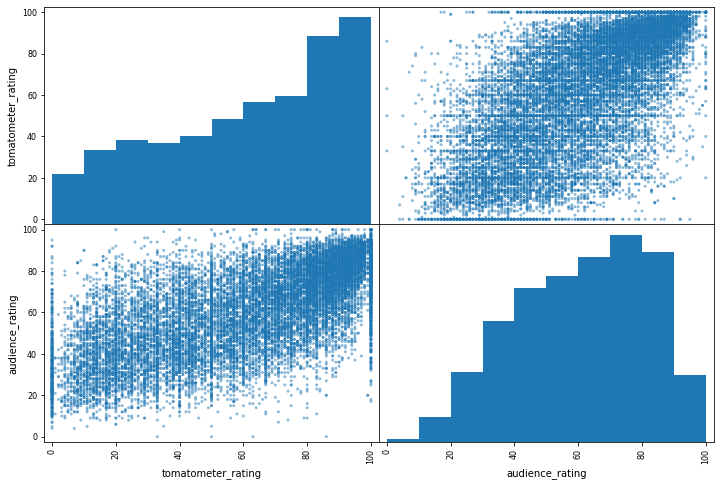

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(numeric[['tomatometer_rating', 'audience_rating']], figsize=(12,8))

There clearly seems to be some correlation between audience and tomatometer rating. We should incorporate this along with some of the categorical variables. But these need to be 

## Data Preprocessing (experimenting)
Experimenting with build in ordinal/onehot encoders as opposed to doing it by hand. We find some issues that are more easily handled doing it by hand since there are so few classes for both the movie ratings (which have low importance) and audience status which has only 2 ratings.
* Process categorical and ordinal features using ordinal (fresh, rotten, certified fresh, etc.) and one-hot encodings (movie rating)
* Process audience status (spilled, upright)

In [19]:
# Process content_rating as categorical variable with no ordering so use one hot
#content_rating_onehot = pd.get_dummies(movies.content_rating)
#content_rating_onehot.head()
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
category_encoded = onehot_encoder.fit_transform(movies[['content_rating']]).toarray()
#onehot_encoder.categories_
category_encoded = pd.DataFrame(category_encoded, columns=onehot_encoder.categories_)
category_encoded

,G,NC17,NR,PG,PG-13,R
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
17663,0.0,0.0,0.0,0.0,0.0,1.0
17664,0.0,0.0,0.0,1.0,0.0,0.0
17665,0.0,0.0,1.0,0.0,0.0,0.0
17666,0.0,0.0,0.0,1.0,0.0,0.0


### Ordinal Encodings
- Audience status and Tomatometer status need an ordinal encoding
- We've already dropped entries where the latter (being the target) is NaN
- For the audience status, there doesn't seem to be anything unique about those entries, so do we keep them? Let's assume yes for now and give them a rating of -1. Later we could probably calculate a value based on other numeric features. We could also assign them based on the critic rating.

In [23]:
# Convert Audience Status Rating and TomatoMeter Rating into Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
audience_ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',
                                     unknown_value=-1)
#audience_ord_encoder.set_params(encoded_missing_value=-1)
audience_encoded = audience_ord_encoder.fit_transform(movies[['audience_status']])
audience_ord_encoder.categories_
np.unique(audience_encoded)
#audience_encoded = pd.DataFrame(audience_encoded, columns = audience_ord_encoder.categories_)
audience_ord_encoder.get_params().keys() # How to check what ord enc. can do
#status_ord_encoder = OrdinalEncoder()
#status_encoded = status_ord_encoder.fit_transform(movies[['tomatometer_status']])
#status_encoded = pd.DataFrame(status_encoded, columns=status_ord_encoder.categories_)
#ordinal_encoded[:10]

dict_keys(['categories', 'dtype', 'handle_unknown', 'unknown_value'])

### TODO: Using Bert to Predict Rating Based on Sentiment